In [2]:
#source --> https://www.rkuhler.com/blog/chapter-2-1-data-objects-and-attribute-types/
#Chapter 2.1 provided information about the different types of attributes or features that we can find in data.

In [3]:
import pandas as pd


In [4]:
#setup google drive
from google.colab import drive


In [5]:
#can use linux commands
!ls

sample_data


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#locate file in google drive (uploaded it separately)
#data source: https://datasets.imdbws.com/
content_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.tsv',sep='\t')

In [8]:
title_file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titles.tsv',sep='\t',low_memory=False)

In [9]:
#combine two data files
data=pd.merge(title_file,content_file,on="tconst")

In [10]:
#sample data
data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1702
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1462
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2262


In [11]:
#Ok, let’s have a look at all of the attributes we have to work with.
data.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')

In [12]:
#The first type of attribute that the book covers is nominal or categorical attributes.
#There are some obvious ones here like primaryTitle and genres.
data['genres'].value_counts()

,count
genres,
Comedy,82994
Drama,73277
Documentary,50425
"Action,Adventure,Animation",27797
Reality-TV,19843
...,...
"Comedy,Musical,Thriller",1
"Documentary,Thriller,War",1
"Action,Animation,Western",1


In [13]:
#What genre is the mode here?
#Answer:Comedy genre is the mode here

In [14]:
#The next type of attribute that the book covers is binary. This would cover true/false type data.
data['isAdult'].value_counts()

,count
isAdult,
0,928836
1,18324
2020,1
2014,1


In [15]:
#The next type of attribute from the book is ordinal.
#The most obvious example here would be the rating of the movie.
data['averageRating'].value_counts()

,count
averageRating,
7.2,33796
7.0,32394
7.6,32220
7.8,31930
7.4,31563
...,...
1.5,273
1.4,254
1.2,194


In [16]:
#These are numerical and can be ordered from worst to best but we wouldn’t say that a 4 star movie is twice as good as a 2 star movie.
#This type of attribute, while numerical, is still qualitative and not quantitative.

In [17]:
#Next up are “interval-scaled numeric attributes”.
#We have the movie’s year of release in our data set which is one of the direct example types from the book.
#we create intervals first
data['startYear'].unique()
data['startYear'].value_counts()

,count
startYear,
2014,41618
2013,41451
2012,41042
2015,38830
2011,38593
...,...
1889,2
1878,2
1877,1


In [19]:

type(data['startYear'][0])

str

In [20]:
def range(startYear):
  if startYear>=1893 and startYear<=1903 :
    return '1893-1903'
  elif startYear>1903 and startYear<=1913 :
    return '1903-1913'
  elif startYear>1913 and startYear<=1923 :
    return '1913-1923'
  elif startYear>1923 and startYear<=1933 :
    return '1923-1933'
  else:
    return '1933-2021'

In [21]:
data=data[data['startYear']!='\\N']

In [22]:
data['startYear']=data['startYear'].apply(int)

In [23]:
data['year']=data['startYear'].apply(range)

In [24]:
data

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,year
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1702,1893-1903
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,210,1933-2021
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1462,1933-2021
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123,1933-2021
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2262,1893-1903
...,...,...,...,...,...,...,...,...,...,...,...,...
947157,tt5258388,movie,American Gospel: Christ Alone,American Gospel: Christ Alone,0,2018,\N,139,Documentary,8.7,833,1933-2021
947158,tt5258390,movie,Ricky,Ricky,0,2016,\N,137,"Romance,Thriller",7.9,786,1933-2021
947159,tt5258426,tvSeries,Volga 30 päivässä,Volga 30 päivässä,0,2016,2016,43,Documentary,7.1,40,1933-2021
947160,tt5258442,short,I Am Yup'ik,I Am Yup'ik,0,2016,\N,17,"Documentary,Short",7.5,37,1933-2021


In [25]:
data['year'].value_counts()

,count
year,
1933-2021,927154
1923-1933,8465
1913-1923,4238
1893-1903,3716
1903-1913,3467


In [18]:
#create time intervals and count the number of movies in every 10 years interval 1893-1903, and so on
#Answer:The number of movies in every 10 years interval are as:
#Year Interval Count
#1993- 2003	  154151
#1983 - 1993	85753
#1973 - 1983	59300
#1963 - 1973	51737
#1953 - 1963	36296
#1943 - 1953	14993
#1933 - 1943	13435
#1923 - 1933	8465
#1913 - 1923	4238
#1893 - 1903	3714
#1903 - 1913	3467


In [40]:
#alternative method
startYear = pd.to_numeric(data['startYear'], errors='coerce')
interval = [1893, 1903, 1913, 1923, 1933, 1943, 1953, 1963, 1973, 1983, 1993, 2003]
label = ['1893 - 1903', '1903 - 1913', '1913 - 1923', '1923 - 1933', '1933 - 1943', '1943  - 1953',
         '1953 - 1963', '1963 - 1973', '1973 - 1983', '1983 - 1993', '1993- 2003']
pd.cut(startYear, bins=interval , labels=label).value_counts()

,count
startYear,
1993- 2003,154151
1983 - 1993,85753
1973 - 1983,59300
1963 - 1973,51737
1953 - 1963,36296
1943 - 1953,14993
1933 - 1943,13435
1923 - 1933,8465
1913 - 1923,4238


In [26]:
#We have many “ratio-scaled numeric attributes” in our data set.
#Example: the count of ratings.
#Unlike interval-scaled attributes, these have a true zero point and can be compared as ratios of different values.
data['numVotes'].unique()
data['averageRating'].value_counts()


,count
averageRating,
7.2,33790
7.0,32392
7.6,32218
7.8,31922
7.4,31561
...,...
1.5,273
1.4,254
1.2,194


In [36]:
#create rating intervals 0.0-1.0,1.1-2.0, and so on to count the number of movies in each category
#Answer:
#averageRating    count
9.1 - 10.0	      32896
8.1 - 9.0	        169797
7.1 - 8.0	        298774
6.1 - 7.0	        232766
5.1 - 6.0	        121452
4.1 - 5.0       	53624
3.1 - 4.0	        22086
2.1 - 3.0	        9048
1.1 - 2.0	        3092
0.0 - 1.0	        0

In [39]:
rating = pd.to_numeric(data['averageRating'], errors='coerce')

# Define the intervals and corresponding labels
intervals = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]  # Intervals split by the boundaries
labels = ['0.0 - 1.0', '1.1 - 2.0', '2.1 - 3.0', '3.1 - 4.0', '4.1 - 5.0',
          '5.1 - 6.0', '6.1 - 7.0', '7.1 - 8.0', '8.1 - 9.0', '9.1 - 10.0']

# Categorize the ratings based on the intervals
categorized_ratings = pd.cut(rating, bins=intervals, labels=labels, right=False)

# Get the count and sort in descending order based on the labels
categorized_ratings.value_counts(sort=False).sort_index(ascending=False)



,count
averageRating,
9.1 - 10.0,32896
8.1 - 9.0,169797
7.1 - 8.0,298774
6.1 - 7.0,232766
5.1 - 6.0,121452
4.1 - 5.0,53624
3.1 - 4.0,22086
2.1 - 3.0,9048
1.1 - 2.0,3092


In [41]:
#While my ratings can be said to be “discrete” because they all fall into one of ten different buckets.
#The IMDB rating is closer to a “continuous” attribute because it is an average of the user ratings.
#However, since they only give us the value rounded to one decimal point,
#there can only be 100 different possible values so maybe it’s still more like a discrete attribute.

In [42]:
#source: https://www.rkuhler.com/blog/chapter-2-2-basic-statistical-descriptions-of-data/
#visualization
import numpy
import matplotlib
%matplotlib inline

<Axes: ylabel='Frequency'>

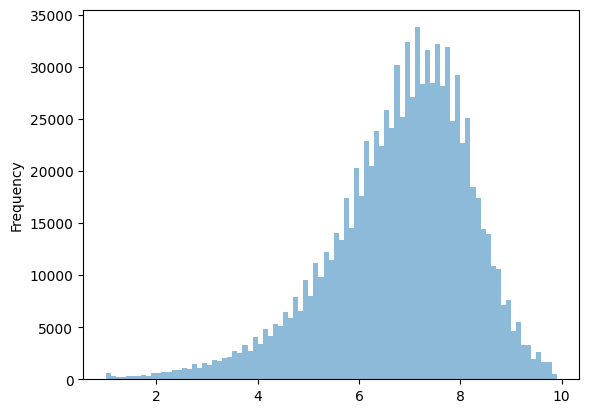

In [43]:
#Previously, we looked at the IMDB rating data as a table but now let’s visualize it with a histogram.
data['averageRating'].plot.hist(
    alpha = 0.5, bins = numpy.arange(1, 10, 0.1))

In [44]:
#We can see from the histogram above that it has a roughly bell shape like a normal distribution.
#However, we can also see it is “positively skewed” towards the higher ratings.
#Just visually inspecting this, I’d guess that it’s “central tendency” is around 6.5.
#Let’s look at some more precise measures of this attribute.
#The pandas library makes this simple.

In [45]:
data['averageRating'].describe()

,averageRating
count,947040.000000
mean,6.868134
std,1.392106
min,1.000000
25%,6.100000
50%,7.000000
75%,7.800000
max,10.000000


In [46]:
#So we can see it has a mean of 6.25 and a median of 6.4.

In [47]:
data['averageRating'].mode()

,averageRating
0,7.2


<Axes: >

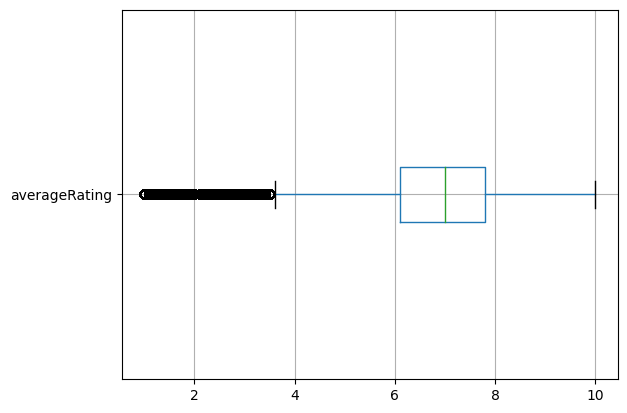

In [48]:
pd.DataFrame.boxplot(
    data, 'averageRating', vert = False,
    return_type = 'axes')

In [49]:
#make sense of this box plot
#Answer:This box plot shows:
#1. Most ratings are between 4 and 7.
#2. The median rating is around 6.
#3. The outliers (black dots) are low ratings near 0.
#4. The distribution is slightly skewed toward higher ratings.

In [50]:
#To get some practice with the pandas libary math functions
import math

In [51]:
print('pandas variance: ' + str(data['averageRating'].var()))
print('pandas standard deviation: ' + str(data['averageRating'].std()))
mean = data['averageRating'].mean()
var = (data['averageRating'].sub(mean).pow(2).sum() /
       data['averageRating'].count())
std = math.sqrt(var)
print('my variance: ' + str(var))
print('my standard deviation: ' + str(std))

pandas variance: 1.9379587130147307
pandas standard deviation: 1.3921058555349628
my variance: 1.9379566666822494
my standard deviation: 1.3921051205574417


In [52]:
mean

6.868133764149351

In [53]:
#what do these numbers mean (variance and standard deviation)?
#Answer:These numbers show how spread out the data is:
#Variance: tells you how much the data points differ from the average, in squared units.
#Standard Deviation: shows the average distance of the data points from the average, in the same units as the data.
#Both measure how much the data varies.

<Axes: xlabel='averageRating', ylabel='numVotes'>

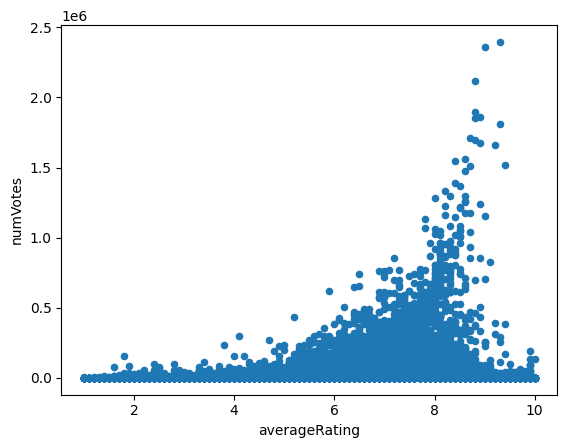

In [54]:
data.plot.scatter('averageRating','numVotes')